In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('C:\\Users\\user\\Desktop\\New folder\\Projects\\Walmart data analysis\\train.csv')
test_data = pd.read_csv('C:\\Users\\user\\Desktop\\New folder\\Projects\\Walmart data analysis\\test.csv')
features_data = pd.read_csv('C:\\Users\\user\\Desktop\\New folder\\Projects\\Walmart data analysis\\features.csv')
stores_data = pd.read_csv('C:\\Users\\user\\Desktop\\New folder\\Projects\\Walmart data analysis\\stores.csv')

In [3]:
print(train_data.shape)
train_data.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
train_data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
train_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
print(test_data.shape)
test_data.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [9]:
test_data.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [10]:
test_data.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [11]:
print(features_data.shape)
features_data.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
features_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
features_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
print(stores_data.shape)
stores_data.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
stores_data.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [18]:
stores_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [19]:
dataset = features_data.merge(stores_data, on = 'Store', how = 'inner')
dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [20]:
from datetime import datetime 

dataset['Date'] = pd.to_datetime(dataset['Date'])
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

dataset['week'] = dataset.Date.dt.isocalendar().week
dataset['year'] = dataset.Date.dt.isocalendar().year

In [21]:
data = train_data.merge(dataset, how = 'inner', on = ['Store', 'Date', 'IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop = True)

In [22]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


***

In [23]:
def scatter(data, column):
    plt.figure()
    plt.scatter(train_data[column], train_data['Weekly_Sales'])
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

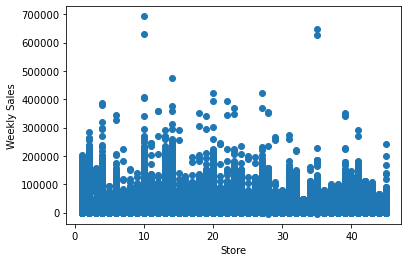

In [24]:
scatter(data, 'Store')

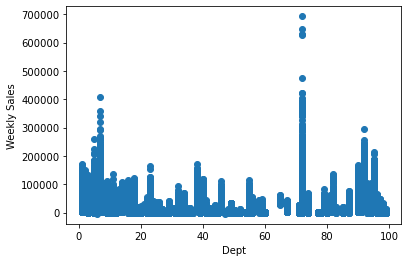

In [25]:
scatter(data, 'Dept')

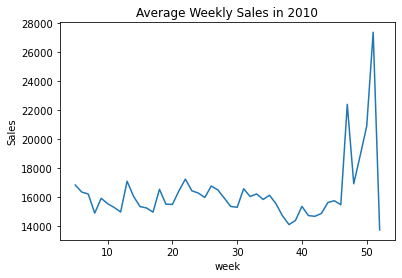

In [26]:
weekly_sales_2010 = data[data['year'] == 2010]['Weekly_Sales'].groupby(data['week']).mean()
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.title('Average Weekly Sales in 2010')
plt.ylabel('Sales')
plt.show()

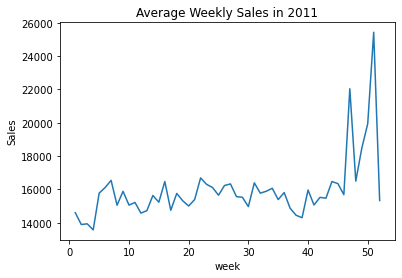

In [27]:
weekly_sales_2011 = data[data['year'] == 2011]['Weekly_Sales'].groupby(data['week']).mean()
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.title('Average Weekly Sales in 2011')
plt.ylabel('Sales')
plt.show()

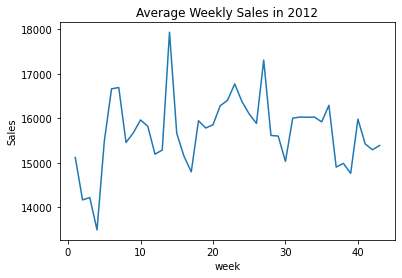

In [28]:
weekly_sales_2012 = data[data['year'] == 2012]['Weekly_Sales'].groupby(data['week']).mean()
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.title('Average Weekly Sales in 2012')
plt.ylabel('Sales')
plt.show()

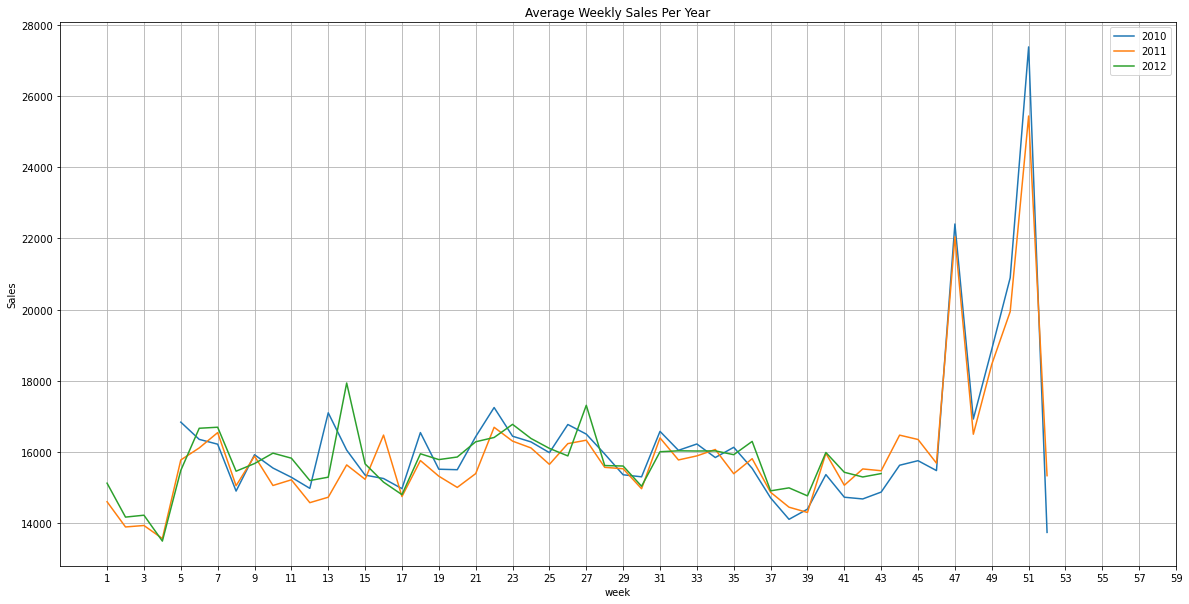

In [29]:
plt.figure(figsize = (20, 10))

sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.grid()

plt.xticks(np.arange(1,60, step = 2))
plt.title('Average Weekly Sales Per Year')
plt.ylabel('Sales')
plt.legend(['2010','2011','2012'])

plt.show()

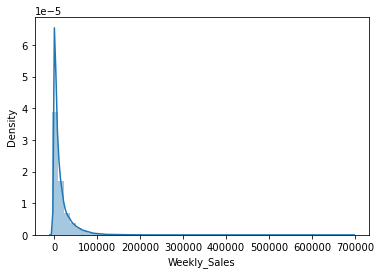

In [30]:
sns.distplot(train_data['Weekly_Sales'])
plt.show()

In [31]:
print('skewness: ', train_data['Weekly_Sales'].skew())
print('kurtosis: ', train_data['Weekly_Sales'].kurt())

skewness:  3.2620081854656657
kurtosis:  21.49128990832619


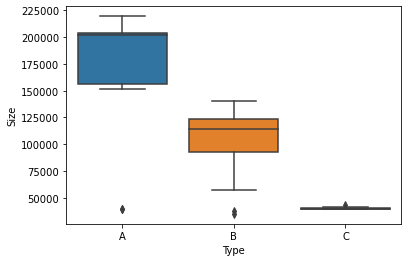

In [32]:
fig = sns.boxplot(x = 'Type', y = 'Size', data = stores_data)

In [33]:
weekly_sales_store = train_data['Weekly_Sales'].groupby(train_data['Store']).mean()

In [34]:
weekly_sales_store_dataframe = pd.DataFrame(weekly_sales_store)

In [35]:
weekly_sales_store_dataframe.sort_values('Weekly_Sales', ascending = False).style.bar(align = 'left')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


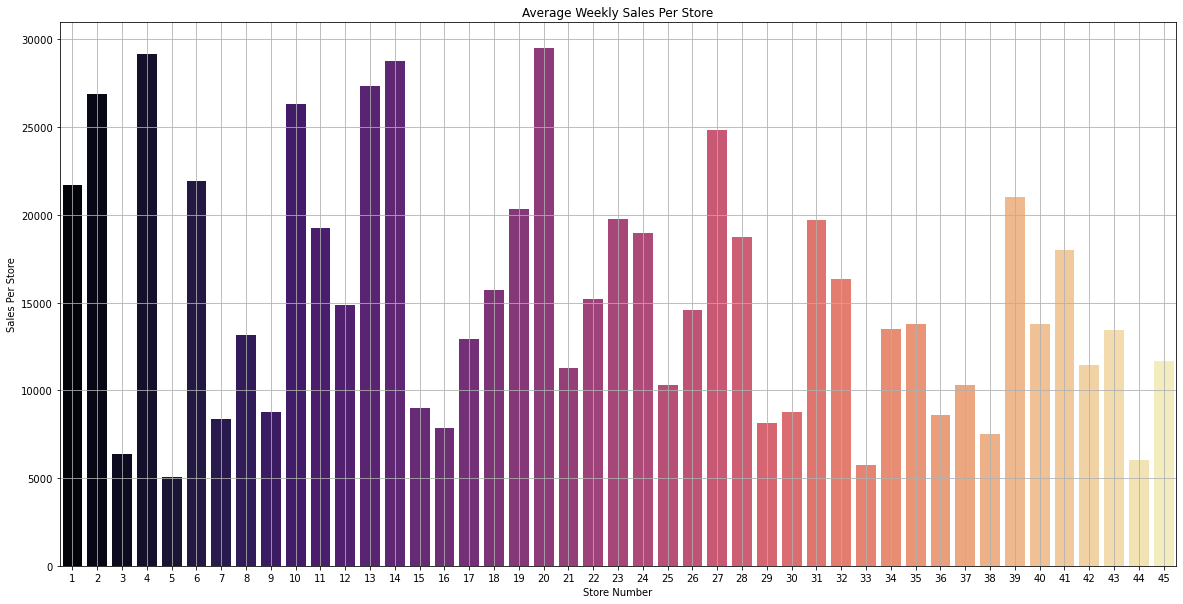

In [36]:
plt.figure(figsize = (20, 10))

sns.barplot(weekly_sales_store.index, weekly_sales_store.values, palette = 'magma')

plt.grid()

plt.title('Average Weekly Sales Per Store')
plt.xlabel('Store Number')
plt.ylabel('Sales Per Store')

plt.show()

In [37]:
weekly_sales_dept = train_data['Weekly_Sales'].groupby(train_data['Dept']).mean()

In [38]:
weekly_sales_dept_dataframe = pd.DataFrame(weekly_sales_dept)

In [39]:
weekly_sales_dept_dataframe.sort_values('Weekly_Sales', ascending = False).style.bar(align = 'left')

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


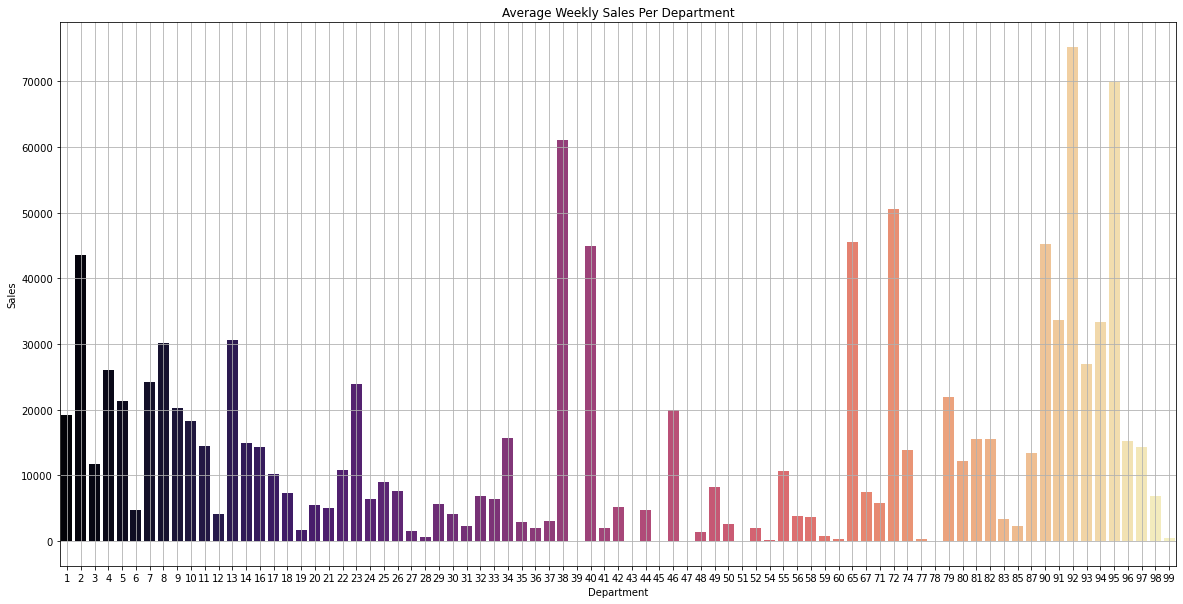

In [40]:
plt.figure(figsize = (20, 10))

sns.barplot(weekly_sales_dept.index, weekly_sales_dept.values, palette = 'magma')

plt.grid()

plt.title('Average Weekly Sales Per Department')
plt.xlabel('Department')
plt.ylabel('Sales')

plt.show()

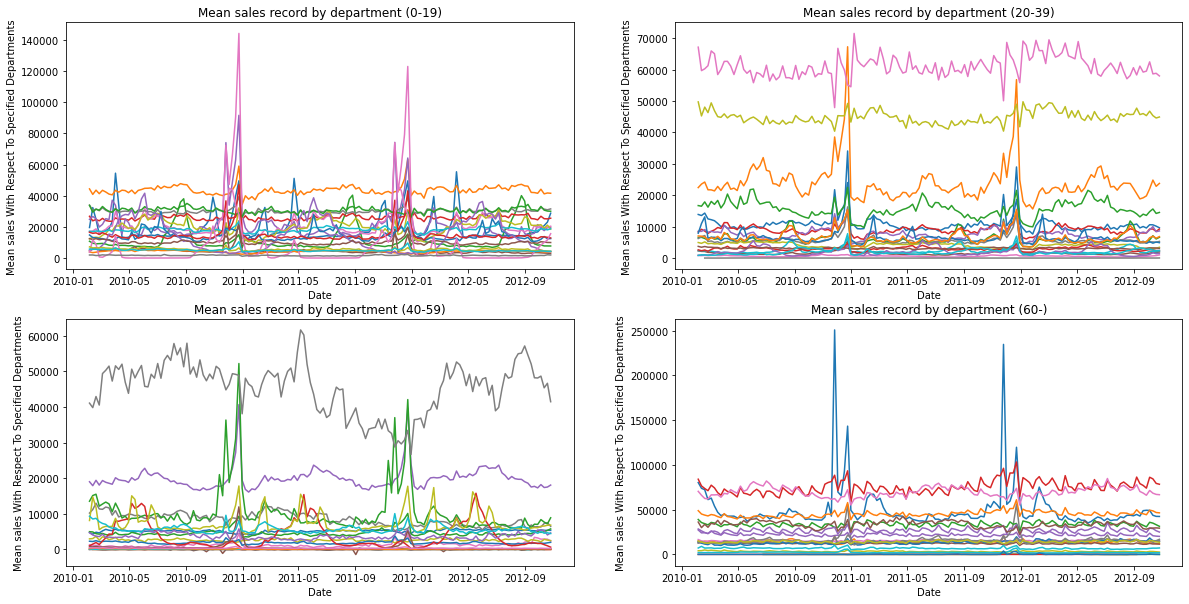

In [41]:
grouped = train_data.groupby(['Dept','Date']).mean().reset_index()

dataset = grouped[['Dept','Date','Weekly_Sales']]

dept = train_data['Dept'].unique()
dept.sort()
dept_1 = dept[0:20]
dept_2 = dept[20:40]
dept_3 = dept[40:60]
dept_4 = dept[60:]

fix, ax = plt.subplots(2, 2, figsize = (20, 10))

for i in dept_1:
    dataset_1 = dataset[dataset['Dept'] == i]
    ax[0,0].plot(dataset_1['Date'], dataset_1['Weekly_Sales'], label = 'Dept 1 mean sales')

for i in dept_2:
    dataset_2 = dataset[dataset['Dept'] == i]
    ax[0,1].plot(dataset_2['Date'], dataset_2['Weekly_Sales'], label = 'Dept 2 mean sales')

for i in dept_3:
    dataset_3 = dataset[dataset['Dept'] == i]
    ax[1,0].plot(dataset_3['Date'], dataset_3['Weekly_Sales'], label = 'Dept 3 mean sales')

for i in dept_4:
    dataset_4 = dataset[dataset['Dept'] == i]
    ax[1,1].plot(dataset_4['Date'], dataset_4['Weekly_Sales'], label = 'Dept 4 mean sales')

ax[0,0].set_title('Mean sales record by department (0-19)')
ax[0,1].set_title('Mean sales record by department (20-39)')
ax[1,0].set_title('Mean sales record by department (40-59)')
ax[1,1].set_title('Mean sales record by department (60-)')

ax[0,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,1].set_xlabel('Date')

plt.show()

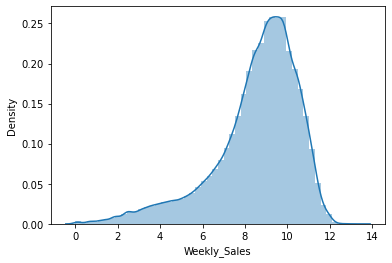

In [42]:
train_over_zero_sales = train_data[train_data['Weekly_Sales'] > 0]
train_below_zero_sales = train_data[train_data['Weekly_Sales'] <= 0]

sales_over_zero_sales = np.log1p(train_over_zero_sales['Weekly_Sales'])

sns.distplot(sales_over_zero_sales)
plt.show()

In [43]:
print('skewness: ', sales_over_zero_sales.skew())
print('kurtosis: ', sales_over_zero_sales.kurt())

skewness:  -1.2011878481918052
kurtosis:  1.5541238937236335


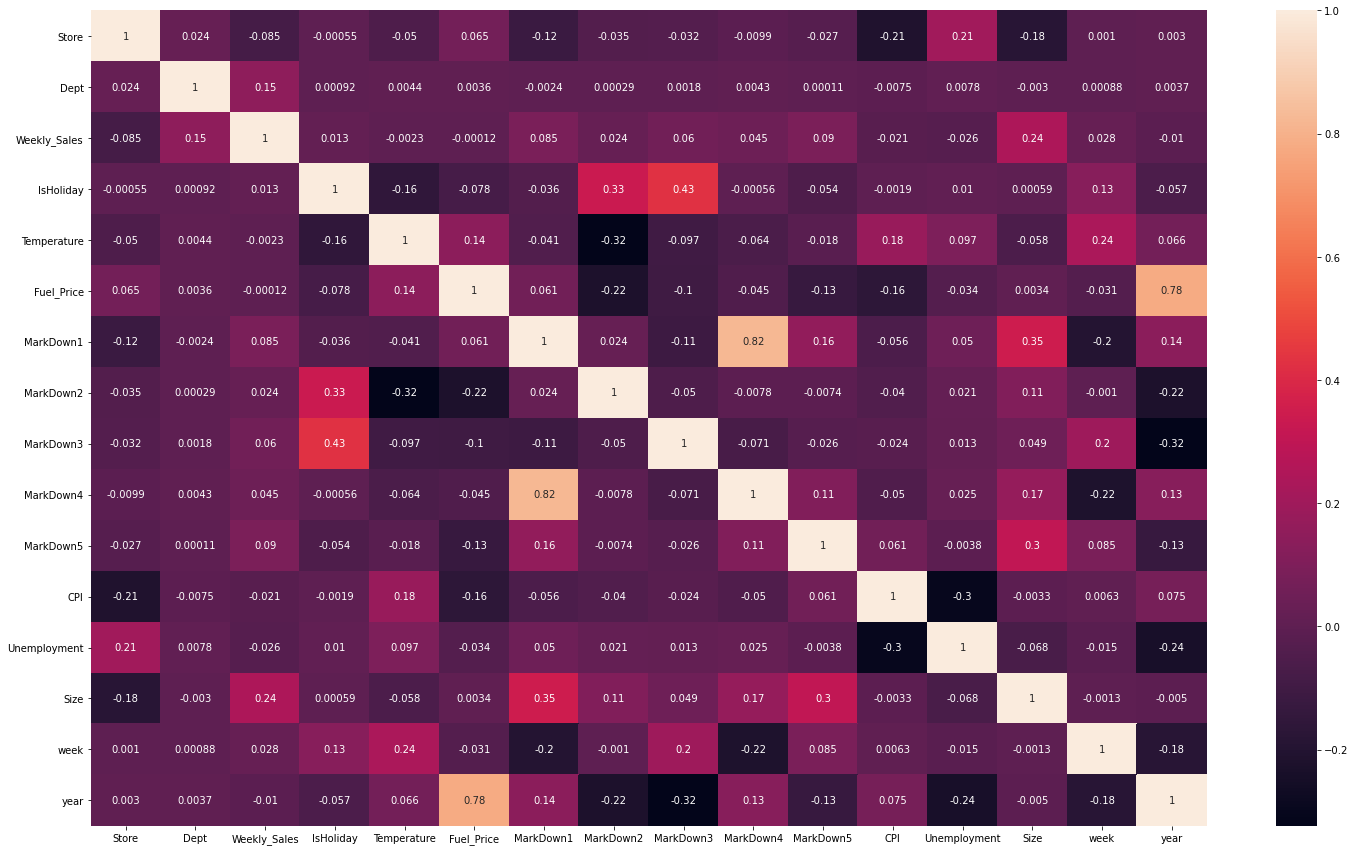

In [44]:
fig, ax = plt.subplots(figsize = (25,15))
sns.heatmap(data.corr(), annot = True)
plt.show()